<h1 style="font-size:220%"> Predicting the Weather Using Machine Learning</h1>

***

This project aims to study the weather of city of Toronto from 2010 to 2019 to make predictions for future weather. The dataset this project would be using is provided by [National Centers For Environmental Information](https://www.ncei.noaa.gov/) and the station where we obtained the information is GHCND:CA00615S001., located in North York, Toronto.

<h1 style="font-size:160%"> TABLE OF CONTENTS </h1>

<a id="0"></a>

>- [Reading Data](#1)
>- [Summary of Columns](#2)
>- [Preparing Data](#3)
>- [Visualizing Data](#4)
>- [Data Training for Maximum Temperature](#5)
>- [Imporving Accuracy](#6)
>- [Data Training for Precipitation](#7)

<a id="1"></a>
<h1 style="font-size:160%"> Reading Data</h1>

***

In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv("local_weather.csv")

In [3]:
weather

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,CA00615S001,"TORONTO NORTH YORK, ON CA",2010-01-01,0.02,0.4,0.0,NaN,32.0,25
1,CA00615S001,"TORONTO NORTH YORK, ON CA",2010-01-02,0.04,0.4,0.8,NaN,11.0,-1
2,CA00615S001,"TORONTO NORTH YORK, ON CA",2010-01-03,0.13,2.2,0.8,NaN,13.0,1
3,CA00615S001,"TORONTO NORTH YORK, ON CA",2010-01-04,0.03,1.3,2.8,NaN,19.0,8
4,CA00615S001,"TORONTO NORTH YORK, ON CA",2010-01-05,0.04,0.7,3.5,NaN,25.0,9
...,...,...,...,...,...,...,...,...,...
3637,CA00615S001,"TORONTO NORTH YORK, ON CA",2019-12-28,0.00,0.0,0.0,37.0,41.0,34
3638,CA00615S001,"TORONTO NORTH YORK, ON CA",2019-12-29,0.45,0.0,0.0,34.0,36.0,32
3639,CA00615S001,"TORONTO NORTH YORK, ON CA",2019-12-30,0.03,0.0,0.0,41.0,49.0,33
3640,CA00615S001,"TORONTO NORTH YORK, ON CA",2019-12-31,0.10,0.9,0.0,32.0,36.0,28


<a id="2"></a>
<h1 style="font-size:160%"> Summary of Columns</h1>

***

According to the Global Historical Climatology Network [$^{[1]}$]((./GHCND_documentation.pdf)), the five core values are:

|Columns||Description|
|---||:------------------|
|PRCP||Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)|
|SNOW||Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)
|
|SNWD||Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)|
|TMAX||Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file|
|TMIN||Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file|

In [4]:
weather.isnull().sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
DATE       0.000000
PRCP       0.001647
SNOW       0.001647
SNWD       0.003020
TAVG       0.526085
TMAX       0.000275
TMIN       0.000000
dtype: float64

In [5]:
core_weather = weather[["DATE","PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()

In [6]:
core_weather

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN
0,2010-01-01,0.02,0.4,0.0,32.0,25
1,2010-01-02,0.04,0.4,0.8,11.0,-1
2,2010-01-03,0.13,2.2,0.8,13.0,1
3,2010-01-04,0.03,1.3,2.8,19.0,8
4,2010-01-05,0.04,0.7,3.5,25.0,9
...,...,...,...,...,...,...
3637,2019-12-28,0.00,0.0,0.0,41.0,34
3638,2019-12-29,0.45,0.0,0.0,36.0,32
3639,2019-12-30,0.03,0.0,0.0,49.0,33
3640,2019-12-31,0.10,0.9,0.0,36.0,28


<a id="3"></a>
<h1 style="font-size:160%"> Preparing Data</h1>

***

To make sure there is no null value for the machine learning:

In [7]:
core_weather.isnull().sum()

DATE     0
PRCP     6
SNOW     6
SNWD    11
TMAX     1
TMIN     0
dtype: int64

To identify the reason of the null value, inspect the data in details.

In [8]:
core_weather[pd.isnull(core_weather["PRCP"])]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN
998,2012-09-25,NaN,NaN,NaN,71.0,51
999,2012-09-26,NaN,NaN,NaN,62.0,56
1000,2012-09-27,NaN,NaN,NaN,63.0,38
1002,2012-09-29,NaN,NaN,NaN,66.0,43
1003,2012-09-30,NaN,NaN,NaN,63.0,46
2607,2017-02-23,NaN,NaN,0.0,NaN,42


Inspect the rows before and after the null value.

In [9]:
import numpy as np
core_weather.iloc[np.r_[995:1007,2604:2611],:]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN
995,2012-09-22,0.01,0.0,0.0,63.0,51
996,2012-09-23,0.06,0.0,0.0,58.0,44
997,2012-09-24,0.00,0.0,0.0,60.0,37
998,2012-09-25,NaN,NaN,NaN,71.0,51
999,2012-09-26,NaN,NaN,NaN,62.0,56
1000,2012-09-27,NaN,NaN,NaN,63.0,38
1001,2012-09-28,0.00,0.0,NaN,66.0,39
1002,2012-09-29,NaN,NaN,NaN,66.0,43
1003,2012-09-30,NaN,NaN,NaN,63.0,46
1004,2012-10-01,0.00,0.0,NaN,68.0,53


The precipitation around the null value is either close to 0 or is 0. It is safe to make an educated guess to repalce them with 0

In [10]:
core_weather.iloc[np.r_[995:1007,2604:2611],:] = core_weather.iloc[np.r_[995:1007,2604:2611],:].fillna(0)

Repeat the same step for other null values

In [11]:
core_weather.isnull().sum()

DATE    0
PRCP    0
SNOW    0
SNWD    4
TMAX    0
TMIN    0
dtype: int64

In [12]:
core_weather[pd.isnull(core_weather["SNWD"])]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN
2271,2016-03-24,0.01,0.0,NaN,31.0,27
2272,2016-03-25,0.00,0.0,NaN,34.0,27
2275,2016-03-28,0.09,0.0,NaN,50.0,40
2293,2016-04-15,0.00,0.0,NaN,58.0,47


In [13]:
core_weather.iloc[np.r_[2268:2279,2290:2297],:]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN
2268,2016-03-21,0.00,0.0,0.0,39.0,24
2269,2016-03-22,0.06,0.0,0.0,43.0,22
2270,2016-03-23,0.00,0.0,0.0,40.0,35
2271,2016-03-24,0.01,0.0,NaN,31.0,27
2272,2016-03-25,0.00,0.0,NaN,34.0,27
2273,2016-03-26,0.00,0.0,0.4,46.0,20
2274,2016-03-27,0.00,0.0,0.0,57.0,27
2275,2016-03-28,0.09,0.0,NaN,50.0,40
2276,2016-03-29,0.00,0.0,0.0,45.0,29
2277,2016-03-30,0.35,0.0,0.0,54.0,24


In [14]:
core_weather.iloc[np.r_[2268:2279,2290:2297],:] = core_weather.iloc[np.r_[2268:2279,2290:2297],:].fillna(0)

In [15]:
core_weather.isnull().sum()

DATE    0
PRCP    0
SNOW    0
SNWD    0
TMAX    0
TMIN    0
dtype: int64

Update index by date for easier access of data during the study.

In [16]:
core_weather.set_index("DATE",inplace = True)

In [17]:
core_weather.index = pd.to_datetime(core_weather.index)

In [18]:
core_weather.dtypes

PRCP    float64
SNOW    float64
SNWD    float64
TMAX    float64
TMIN      int64
dtype: object

In [19]:
core_weather.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', name='DATE', length=3642, freq=None)

In the documentation, it is stated that:
>- Note: 9’s in a field (e.g.9999) indicate missing data or data that has not been received.

To make sure this does not happen to our dataset:

In [20]:
core_weather.apply(lambda x: (x==999)).sum()

PRCP    0
SNOW    0
SNWD    0
TMAX    0
TMIN    0
dtype: int64

<a id="4"></a>
<h1 style="font-size:160%"> Visualizing Data</h1>

***

Visualizing the data to ensure we are not missing a significant amount of period of data.

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_year(data_index,data_columns):
    fig, ax = plt.subplots()
    ax.plot(data_index, data_columns)
    plt.xticks(rotation=90)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) 

    plt.show()

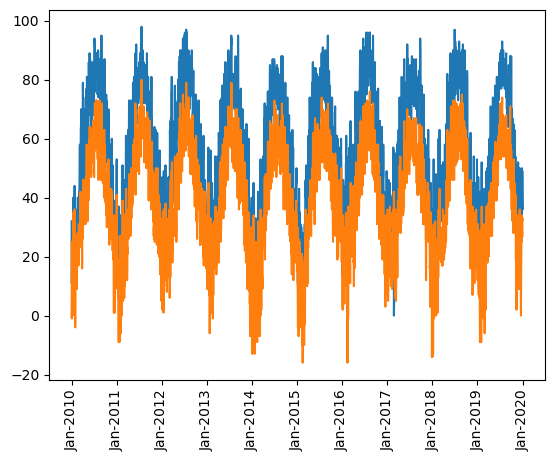

In [22]:
plot_year(core_weather.index, core_weather[["TMAX","TMIN"]])

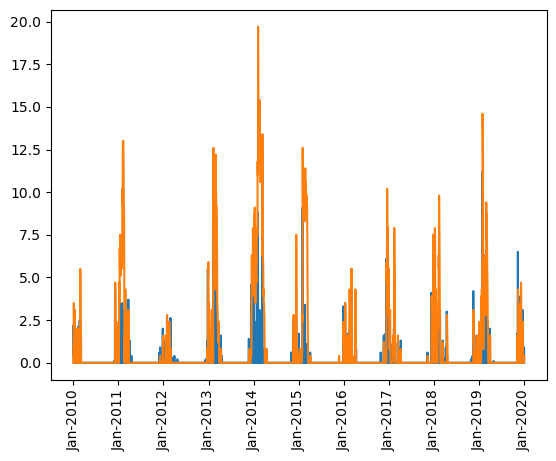

In [23]:
plot_year(core_weather.index, core_weather[["SNOW","SNWD"]])

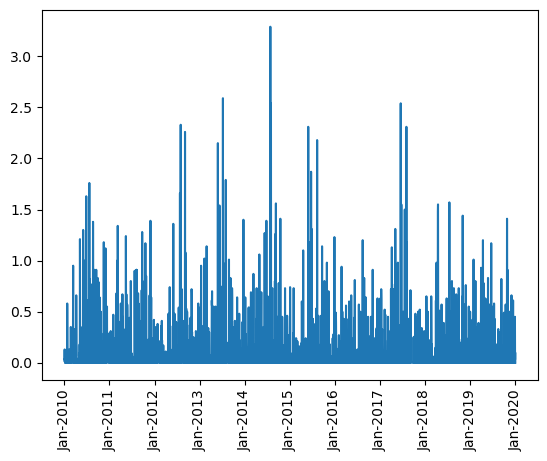

In [24]:
plot_year(core_weather.index, core_weather[["PRCP"]])

<a id="5"></a>
<h1 style="font-size:160%">Data Training for Maximum Temperature</h1>

***

Predicting tomorrow's temperature given historical data. Create a target column, then create a train and test set and train a model.

In [25]:
core_weather["target"] = core_weather.shift(-1)["TMAX"]

In [26]:
core_weather

,PRCP,SNOW,SNWD,TMAX,TMIN,target
DATE,,,,,,
2010-01-01,0.02,0.4,0.0,32.0,25,11.0
2010-01-02,0.04,0.4,0.8,11.0,-1,13.0
2010-01-03,0.13,2.2,0.8,13.0,1,19.0
2010-01-04,0.03,1.3,2.8,19.0,8,25.0
2010-01-05,0.04,0.7,3.5,25.0,9,27.0
...,...,...,...,...,...,...
2019-12-28,0.00,0.0,0.0,41.0,34,36.0
2019-12-29,0.45,0.0,0.0,36.0,32,49.0
2019-12-30,0.03,0.0,0.0,49.0,33,36.0


In [27]:
core_weather = core_weather.iloc[:-1,:]

In [28]:
core_weather

,PRCP,SNOW,SNWD,TMAX,TMIN,target
DATE,,,,,,
2010-01-01,0.02,0.4,0.0,32.0,25,11.0
2010-01-02,0.04,0.4,0.8,11.0,-1,13.0
2010-01-03,0.13,2.2,0.8,13.0,1,19.0
2010-01-04,0.03,1.3,2.8,19.0,8,25.0
2010-01-05,0.04,0.7,3.5,25.0,9,27.0
...,...,...,...,...,...,...
2019-12-27,0.00,0.0,0.0,50.0,34,41.0
2019-12-28,0.00,0.0,0.0,41.0,34,36.0
2019-12-29,0.45,0.0,0.0,36.0,32,49.0


In [29]:
predictors = ["PRCP","SNOW","SNWD","TMAX","TMIN"]

In [30]:
train = core_weather.loc[:"2016-12-31"]
test = core_weather.loc["2017-01-01":]

Find the ideal penalty to prevent overfitting.

In [31]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=np.array([.1, .2, .3, .4]))
rcv.fit(train[predictors], train["target"])
rcv.alpha_

0.4

In [32]:
rcv = RidgeCV(alphas=np.array([.38, .39, .4, .41]))
rcv.fit(train[predictors], train["target"])
rcv.alpha_

0.41

In [33]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.41)

In [34]:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.41)

In [35]:
predictions = reg.predict(test[predictors])

In [36]:
combined = pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis =1)

In [37]:
combined.rename(columns = {0:'predict'}, inplace = True)
combined

,target,predict
DATE,,
2017-01-01,40.0,38.361471
2017-01-02,39.0,41.135296
2017-01-03,35.0,38.927533
2017-01-04,20.0,37.163293
2017-01-05,19.0,23.191687
...,...,...
2019-12-27,41.0,51.030115
2019-12-28,36.0,42.605851
2019-12-29,49.0,37.018736


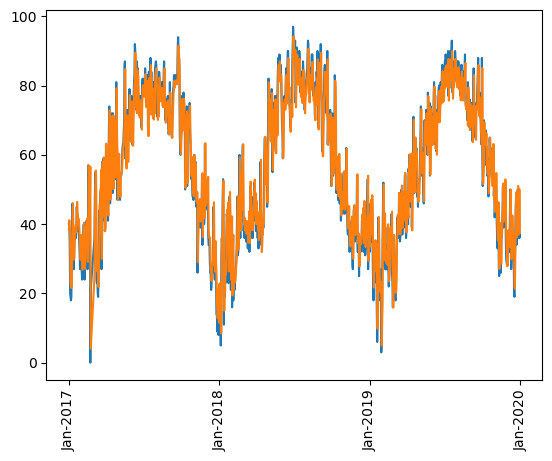

In [38]:
plot_year(combined.index,combined[["target",'predict']])

In [39]:
combined_diff = combined.copy()
combined_diff['diff'] = combined_diff['target']-combined['predict']
combined_diff

,target,predict,diff
DATE,,,
2017-01-01,40.0,38.361471,1.638529
2017-01-02,39.0,41.135296,-2.135296
2017-01-03,35.0,38.927533,-3.927533
2017-01-04,20.0,37.163293,-17.163293
2017-01-05,19.0,23.191687,-4.191687
...,...,...,...
2019-12-27,41.0,51.030115,-10.030115
2019-12-28,36.0,42.605851,-6.605851
2019-12-29,49.0,37.018736,11.981264


In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target"],predictions)

5.860857792325634

In [41]:
reg.coef_

array([-2.11746221, -0.3812429 , -0.21318493,  0.93602926, -0.02294434])

Visually, the predictions matches the trend of the actual temperature. On average, the prediction is about 5.8 degree off from the actual temperature.

<a id="6"></a>
<h1 style="font-size:160%">Imporving Accuracy</h1>

***

Before improving accuracy, create a back test function for convenience purposes.

In [42]:
def create_predicitons(core_weather,predictors,reg):
    train = core_weather.loc[:"2016-12-31"]
    test = core_weather.loc["2017-01-01":]
    reg.fit(train[predictors],train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"],predictions)
    combined = pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis =1)
    combined.rename(columns = {0:'predict'}, inplace = True)
    return combined, error 

Improving accuracy of the predictions by introducint rolling means. In this specific case, the project would perform a 3 day rolling mean and a 14 day rolling mean.

In [43]:
def percent_diff(old,new):
    return new-old/old
def compute_rolling(core_weather,horizon,col):
    label = f"rolling_mean_{horizon}_{col}"
    
    core_weather[label] = core_weather[col].rolling(horizon).mean()
    core_weather[f"percent_diff_{label}"] = percent_diff(core_weather[label],core_weather[col])
    return core_weather

In [44]:
core_weather=core_weather.copy()
rolling_horizons = [3,14]
for h in rolling_horizons:
    for col in ["PRCP","TMAX","TMIN"]:
        compute_rolling(core_weather,h,col)
core_weather

,PRCP,SNOW,SNWD,TMAX,TMIN,target,rolling_mean_3_PRCP,percent_diff_rolling_mean_3_PRCP,rolling_mean_3_TMAX,percent_diff_rolling_mean_3_TMAX,rolling_mean_3_TMIN,percent_diff_rolling_mean_3_TMIN,rolling_mean_14_PRCP,percent_diff_rolling_mean_14_PRCP,rolling_mean_14_TMAX,percent_diff_rolling_mean_14_TMAX,rolling_mean_14_TMIN,percent_diff_rolling_mean_14_TMIN
DATE,,,,,,,,,,,,,,,,,,
2010-01-01,0.02,0.4,0.0,32.0,25,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,0.04,0.4,0.8,11.0,-1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,0.13,2.2,0.8,13.0,1,19.0,0.063333,-0.87,18.666667,12.0,8.333333,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.03,1.3,2.8,19.0,8,25.0,0.066667,-0.97,14.333333,18.0,2.666667,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.04,0.7,3.5,25.0,9,27.0,0.066667,-0.96,19.000000,24.0,6.000000,8.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.00,0.0,0.0,50.0,34,41.0,0.000000,NaN,43.666667,49.0,31.333333,33.0,0.051429,-1.00,35.571429,49.0,21.642857,33.0
2019-12-28,0.00,0.0,0.0,41.0,34,36.0,0.000000,NaN,45.000000,40.0,33.000000,33.0,0.007857,-1.00,35.928571,40.0,21.857143,33.0
2019-12-29,0.45,0.0,0.0,36.0,32,49.0,0.150000,-0.55,42.333333,35.0,33.333333,31.0,0.040000,-0.55,36.285714,35.0,22.214286,31.0


In [45]:
core_weather=core_weather.iloc[14:,:]
core_weather=core_weather.fillna(0)
core_weather

,PRCP,SNOW,SNWD,TMAX,TMIN,target,rolling_mean_3_PRCP,percent_diff_rolling_mean_3_PRCP,rolling_mean_3_TMAX,percent_diff_rolling_mean_3_TMAX,rolling_mean_3_TMIN,percent_diff_rolling_mean_3_TMIN,rolling_mean_14_PRCP,percent_diff_rolling_mean_14_PRCP,rolling_mean_14_TMAX,percent_diff_rolling_mean_14_TMAX,rolling_mean_14_TMIN,percent_diff_rolling_mean_14_TMIN
DATE,,,,,,,,,,,,,,,,,,
2010-01-15,0.00,0.0,1.6,39.0,35,36.0,0.000000,0.00,37.666667,38.0,21.666667,34.0,0.022143,-1.00,24.714286,38.0,11.714286,34.0
2010-01-16,0.00,0.0,0.8,36.0,30,37.0,0.000000,0.00,38.333333,35.0,26.333333,29.0,0.019286,-1.00,26.500000,35.0,13.928571,29.0
2010-01-17,0.00,0.0,0.0,37.0,27,35.0,0.000000,0.00,37.333333,36.0,30.666667,26.0,0.010000,-1.00,28.214286,36.0,15.785714,26.0
2010-01-18,0.00,0.0,0.0,35.0,28,37.0,0.000000,0.00,36.000000,34.0,28.333333,27.0,0.007857,-1.00,29.357143,34.0,17.214286,27.0
2010-01-19,0.02,0.2,0.0,37.0,23,29.0,0.006667,-0.98,36.333333,36.0,26.000000,22.0,0.006429,-0.98,30.214286,36.0,18.214286,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.00,0.0,0.0,50.0,34,41.0,0.000000,0.00,43.666667,49.0,31.333333,33.0,0.051429,-1.00,35.571429,49.0,21.642857,33.0
2019-12-28,0.00,0.0,0.0,41.0,34,36.0,0.000000,0.00,45.000000,40.0,33.000000,33.0,0.007857,-1.00,35.928571,40.0,21.857143,33.0
2019-12-29,0.45,0.0,0.0,36.0,32,49.0,0.150000,-0.55,42.333333,35.0,33.333333,31.0,0.040000,-0.55,36.285714,35.0,22.214286,31.0


Another predictor that could be introduced is expand mean.

In [46]:
def expand_mean(core_weather):
    return core_weather.expanding(1).mean()
for col in ["PRCP","TMAX","TMIN"]:
    core_weather[f"month_avg_{col}"]=core_weather[col].groupby(core_weather.index.month,group_keys=False).apply(expand_mean)
    core_weather[f"day_avg_{col}"]=core_weather[col].groupby(core_weather.index.day_of_year,group_keys=False).apply(expand_mean)
core_weather

,PRCP,SNOW,SNWD,TMAX,TMIN,target,rolling_mean_3_PRCP,percent_diff_rolling_mean_3_PRCP,rolling_mean_3_TMAX,percent_diff_rolling_mean_3_TMAX,...,rolling_mean_14_TMAX,percent_diff_rolling_mean_14_TMAX,rolling_mean_14_TMIN,percent_diff_rolling_mean_14_TMIN,month_avg_PRCP,day_avg_PRCP,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-15,0.00,0.0,1.6,39.0,35,36.0,0.000000,0.00,37.666667,38.0,...,24.714286,38.0,11.714286,34.0,0.000000,0.000,39.000000,39.0,35.000000,35.0
2010-01-16,0.00,0.0,0.8,36.0,30,37.0,0.000000,0.00,38.333333,35.0,...,26.500000,35.0,13.928571,29.0,0.000000,0.000,37.500000,36.0,32.500000,30.0
2010-01-17,0.00,0.0,0.0,37.0,27,35.0,0.000000,0.00,37.333333,36.0,...,28.214286,36.0,15.785714,26.0,0.000000,0.000,37.333333,37.0,30.666667,27.0
2010-01-18,0.00,0.0,0.0,35.0,28,37.0,0.000000,0.00,36.000000,34.0,...,29.357143,34.0,17.214286,27.0,0.000000,0.000,36.750000,35.0,30.000000,28.0
2010-01-19,0.02,0.2,0.0,37.0,23,29.0,0.006667,-0.98,36.333333,36.0,...,30.214286,36.0,18.214286,22.0,0.004000,0.020,36.800000,37.0,28.600000,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.00,0.0,0.0,50.0,34,41.0,0.000000,0.00,43.666667,49.0,...,35.571429,49.0,21.642857,33.0,0.074281,0.188,35.764706,38.1,23.790850,22.1
2019-12-28,0.00,0.0,0.0,41.0,34,36.0,0.000000,0.00,45.000000,40.0,...,35.928571,40.0,21.857143,33.0,0.074039,0.127,35.781759,33.2,23.824104,21.6
2019-12-29,0.45,0.0,0.0,36.0,32,49.0,0.150000,-0.55,42.333333,35.0,...,36.285714,35.0,22.214286,31.0,0.075260,0.115,35.782468,30.8,23.850649,19.5


Make sure there is no null values.

In [47]:
core_weather.isnull().sum()

PRCP                                 0
SNOW                                 0
SNWD                                 0
TMAX                                 0
TMIN                                 0
target                               0
rolling_mean_3_PRCP                  0
percent_diff_rolling_mean_3_PRCP     0
rolling_mean_3_TMAX                  0
percent_diff_rolling_mean_3_TMAX     0
rolling_mean_3_TMIN                  0
percent_diff_rolling_mean_3_TMIN     0
rolling_mean_14_PRCP                 0
percent_diff_rolling_mean_14_PRCP    0
rolling_mean_14_TMAX                 0
percent_diff_rolling_mean_14_TMAX    0
rolling_mean_14_TMIN                 0
percent_diff_rolling_mean_14_TMIN    0
month_avg_PRCP                       0
day_avg_PRCP                         0
month_avg_TMAX                       0
day_avg_TMAX                         0
month_avg_TMIN                       0
day_avg_TMIN                         0
dtype: int64

In [48]:
predictors = core_weather.columns[core_weather.columns != "target"]

In [49]:
predictors

Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'rolling_mean_3_PRCP',
       'percent_diff_rolling_mean_3_PRCP', 'rolling_mean_3_TMAX',
       'percent_diff_rolling_mean_3_TMAX', 'rolling_mean_3_TMIN',
       'percent_diff_rolling_mean_3_TMIN', 'rolling_mean_14_PRCP',
       'percent_diff_rolling_mean_14_PRCP', 'rolling_mean_14_TMAX',
       'percent_diff_rolling_mean_14_TMAX', 'rolling_mean_14_TMIN',
       'percent_diff_rolling_mean_14_TMIN', 'month_avg_PRCP', 'day_avg_PRCP',
       'month_avg_TMAX', 'day_avg_TMAX', 'month_avg_TMIN', 'day_avg_TMIN'],
      dtype='object')

Rerun the prediction:

In [50]:
combined,error = create_predicitons(core_weather,predictors,reg)

In [51]:
combined

,target,predict
DATE,,
2017-01-01,40.0,34.316775
2017-01-02,39.0,36.489113
2017-01-03,35.0,32.079852
2017-01-04,20.0,34.454298
2017-01-05,19.0,25.110631
...,...,...
2019-12-27,41.0,44.276098
2019-12-28,36.0,38.634399
2019-12-29,49.0,33.205141


In [52]:
error

5.4123313935759745

On average, the prediction is about 5.4 degree off from the actual temperature. There is a minor improvement in error.

In [53]:
combined_diff = combined.copy()
combined_diff['diff'] = combined_diff['target']-combined['predict']
combined_diff.sort_values("diff",ascending=False)

,target,predict,diff
DATE,,,
2018-02-19,60.0,37.068691,22.931309
2017-02-17,57.0,34.185853,22.814147
2019-09-30,88.0,65.712873,22.287127
2018-10-08,83.0,61.500440,21.499560
2017-04-26,81.0,59.752804,21.247196
...,...,...,...
2019-01-29,3.0,23.627657,-20.627657
2017-11-09,26.0,49.275900,-23.275900
2018-01-12,11.0,35.020374,-24.020374


These are the outliers of the predictions. This may happen due to sudden weather changes such as storms.

In [54]:
core_weather["2019-01-25":"2019-02-05"]

,PRCP,SNOW,SNWD,TMAX,TMIN,target,rolling_mean_3_PRCP,percent_diff_rolling_mean_3_PRCP,rolling_mean_3_TMAX,percent_diff_rolling_mean_3_TMAX,...,rolling_mean_14_TMAX,percent_diff_rolling_mean_14_TMAX,rolling_mean_14_TMIN,percent_diff_rolling_mean_14_TMIN,month_avg_PRCP,day_avg_PRCP,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-25,0.00,0.0,1.6,22.0,17,22.0,0.110000,-1.00,32.666667,21.0,...,26.142857,21.0,11.214286,16.0,0.066310,0.045,30.379310,30.9,16.675862,18.5
2019-01-26,0.22,3.5,1.6,22.0,7,18.0,0.073333,-0.78,26.000000,21.0,...,26.000000,21.0,10.785714,6.0,0.066838,0.085,30.350515,31.9,16.642612,19.6
2019-01-27,0.00,0.0,5.9,18.0,11,27.0,0.073333,-1.00,20.666667,17.0,...,25.642857,17.0,10.928571,10.0,0.066610,0.039,30.308219,29.7,16.623288,19.6
2019-01-28,1.01,11.2,4.7,27.0,-5,23.0,0.410000,0.01,22.333333,26.0,...,25.285714,26.0,9.642857,-6.0,0.069829,0.120,30.296928,30.3,16.549488,17.0
2019-01-29,0.00,0.0,14.6,23.0,8,3.0,0.336667,-1.00,22.666667,22.0,...,24.571429,22.0,8.571429,7.0,0.069592,0.089,30.272109,27.7,16.520408,15.4
2019-01-30,0.00,0.0,13.8,3.0,-3,9.0,0.336667,-1.00,17.666667,2.0,...,22.571429,2.0,7.071429,-4.0,0.069356,0.037,30.179661,26.6,16.454237,10.4
2019-01-31,0.00,0.0,13.8,9.0,-9,17.0,0.000000,0.00,11.666667,8.0,...,21.285714,8.0,6.000000,-10.0,0.069122,0.036,30.108108,30.2,16.368243,10.2
2019-02-01,0.00,0.0,12.6,17.0,-4,35.0,0.000000,0.00,9.666667,16.0,...,20.214286,16.0,4.214286,-5.0,0.076080,0.176,31.084000,30.6,16.636000,17.2
2019-02-02,0.00,0.0,9.4,35.0,3,45.0,0.000000,0.00,20.333333,34.0,...,21.642857,34.0,4.071429,2.0,0.075777,0.049,31.099602,27.2,16.581673,14.5


<AxesSubplot:>

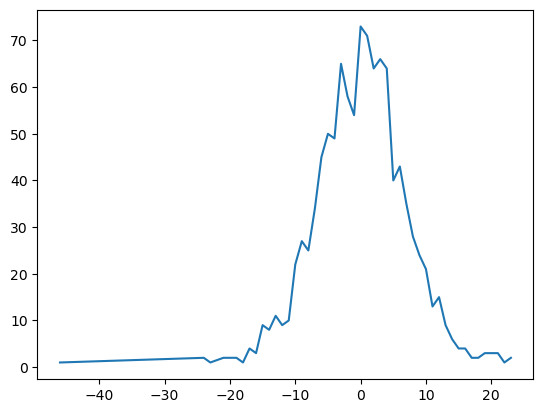

In [55]:
combined_diff["diff"].round().value_counts().sort_index().plot()

Visually speaking, the model is doing pretty good, most differences fall at 0 or near 0. There are a couple ways to further improve the prediction. One would be include Geopotential height as a predictors [$^{[2]}$](https://www.weather.gov/source/zhu/ZHU_Training_Page/Miscellaneous/Heights_Thicknesses/thickness_temperature.htm). Another way of improving is to set the index by specific time and predict the tempreature by day.

<a id="7"></a>
<h1 style="font-size:160%">Data Training for Precipitation</h1>

***

In [56]:
core_weather.drop(columns = "target")
core_weather["target"] = core_weather.shift(-1)["PRCP"]
core_weather = core_weather[:-1].copy()
core_weather

,PRCP,SNOW,SNWD,TMAX,TMIN,target,rolling_mean_3_PRCP,percent_diff_rolling_mean_3_PRCP,rolling_mean_3_TMAX,percent_diff_rolling_mean_3_TMAX,...,rolling_mean_14_TMAX,percent_diff_rolling_mean_14_TMAX,rolling_mean_14_TMIN,percent_diff_rolling_mean_14_TMIN,month_avg_PRCP,day_avg_PRCP,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-15,0.00,0.0,1.6,39.0,35,0.00,0.000000,0.00,37.666667,38.0,...,24.714286,38.0,11.714286,34.0,0.000000,0.000,39.000000,39.0,35.000000,35.0
2010-01-16,0.00,0.0,0.8,36.0,30,0.00,0.000000,0.00,38.333333,35.0,...,26.500000,35.0,13.928571,29.0,0.000000,0.000,37.500000,36.0,32.500000,30.0
2010-01-17,0.00,0.0,0.0,37.0,27,0.00,0.000000,0.00,37.333333,36.0,...,28.214286,36.0,15.785714,26.0,0.000000,0.000,37.333333,37.0,30.666667,27.0
2010-01-18,0.00,0.0,0.0,35.0,28,0.02,0.000000,0.00,36.000000,34.0,...,29.357143,34.0,17.214286,27.0,0.000000,0.000,36.750000,35.0,30.000000,28.0
2010-01-19,0.02,0.2,0.0,37.0,23,0.00,0.006667,-0.98,36.333333,36.0,...,30.214286,36.0,18.214286,22.0,0.004000,0.020,36.800000,37.0,28.600000,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,0.00,0.0,0.0,44.0,31,0.00,0.000000,0.00,38.333333,43.0,...,34.928571,43.0,20.785714,30.0,0.074525,0.026,35.718033,34.6,23.757377,24.9
2019-12-27,0.00,0.0,0.0,50.0,34,0.00,0.000000,0.00,43.666667,49.0,...,35.571429,49.0,21.642857,33.0,0.074281,0.188,35.764706,38.1,23.790850,22.1
2019-12-28,0.00,0.0,0.0,41.0,34,0.45,0.000000,0.00,45.000000,40.0,...,35.928571,40.0,21.857143,33.0,0.074039,0.127,35.781759,33.2,23.824104,21.6


In [57]:
from sklearn.ensemble import RandomForestRegressor

train = core_weather.loc[:"2016-12-31"]
test = core_weather.loc["2017-01-01":]

rf_model = RandomForestRegressor()
rf_model.fit(train[predictors], train["target"])

RandomForestRegressor()

The reason the project uses RandomForestRegressor is because unlike temperature precipitation is seasonal, so a decision tree would be a more accurate model when prediciting precipitation.

In [58]:
core_weather.corr()

,PRCP,SNOW,SNWD,TMAX,TMIN,target,rolling_mean_3_PRCP,percent_diff_rolling_mean_3_PRCP,rolling_mean_3_TMAX,percent_diff_rolling_mean_3_TMAX,...,rolling_mean_14_TMAX,percent_diff_rolling_mean_14_TMAX,rolling_mean_14_TMIN,percent_diff_rolling_mean_14_TMIN,month_avg_PRCP,day_avg_PRCP,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN
PRCP,1.000000,0.203092,-0.048519,0.065139,0.110684,0.058272,0.578554,0.345759,0.075543,0.065139,...,0.070764,0.065139,0.073730,0.110684,0.160859,0.554566,0.078836,0.073068,0.079188,0.091142
SNOW,0.203092,1.000000,0.191951,-0.274261,-0.259816,-0.008882,0.094044,0.001767,-0.267045,-0.274261,...,-0.251836,-0.274261,-0.246446,-0.259816,-0.131371,0.049116,-0.242802,-0.251030,-0.236487,-0.243536
SNWD,-0.048519,0.191951,1.000000,-0.484013,-0.508868,-0.049709,-0.032159,-0.105534,-0.511313,-0.484013,...,-0.527648,-0.484013,-0.547143,-0.508868,-0.228892,-0.077339,-0.437844,-0.447887,-0.436783,-0.452399
TMAX,0.065139,-0.274261,-0.484013,1.000000,0.924144,0.085149,0.066992,0.182299,0.965433,1.000000,...,0.916082,1.000000,0.887296,0.924144,0.538643,0.155875,0.896697,0.932259,0.890781,0.908100
TMIN,0.110684,-0.259816,-0.508868,0.924144,1.000000,0.071972,0.163342,0.110747,0.946067,0.924144,...,0.906881,0.924144,0.899348,1.000000,0.543709,0.178234,0.872201,0.889687,0.877526,0.918996
target,0.058272,-0.008882,-0.049709,0.085149,0.071972,1.000000,0.012996,0.010880,0.075300,0.085149,...,0.071076,0.085149,0.069799,0.071972,0.049162,0.052965,0.080411,0.077964,0.079232,0.079169
rolling_mean_3_PRCP,0.578554,0.094044,-0.032159,0.066992,0.163342,0.012996,1.000000,-0.037615,0.101057,0.066992,...,0.115268,0.066992,0.128932,0.163342,0.255675,0.328071,0.129437,0.108850,0.134212,0.148638
percent_diff_rolling_mean_3_PRCP,0.345759,0.001767,-0.105534,0.182299,0.110747,0.010880,-0.037615,1.000000,0.158978,0.182299,...,0.126913,0.182299,0.112968,0.110747,0.042750,0.206976,0.129638,0.144817,0.123739,0.121963
rolling_mean_3_TMAX,0.075543,-0.267045,-0.511313,0.965433,0.946067,0.075300,0.101057,0.158978,1.000000,0.965433,...,0.951530,0.965433,0.925582,0.946067,0.561841,0.164263,0.924126,0.940158,0.920452,0.934534
percent_diff_rolling_mean_3_TMAX,0.065139,-0.274261,-0.484013,1.000000,0.924144,0.085149,0.066992,0.182299,0.965433,1.000000,...,0.916082,1.000000,0.887296,0.924144,0.538643,0.155875,0.896697,0.932259,0.890781,0.908100


In [59]:
predictions =  rf_model.predict(test[predictors])
predictions

array([0.0359, 0.0467, 0.2464, ..., 0.051 , 0.3078, 0.0391])

In [60]:
combined = pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis =1)
combined.rename(columns = {0:'predict'}, inplace = True)

In [61]:
combined

,target,predict
DATE,,
2017-01-01,0.13,0.0359
2017-01-02,0.63,0.0467
2017-01-03,0.00,0.2464
2017-01-04,0.00,0.0457
2017-01-05,0.00,0.0691
...,...,...
2019-12-26,0.00,0.0546
2019-12-27,0.00,0.0460
2019-12-28,0.45,0.0510


In [62]:
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_error(test["target"],predictions)
error_pct = mean_absolute_percentage_error(test["target"],predictions)

In [63]:
error

0.14120561694290973

The difference in prediction and actual precipitation is about 0.14, which is a confusing concept. To better understand, we could visualize the differences.

In [69]:
combined_diff = combined.copy()
combined_diff['diff'] = combined_diff['target']-combined['predict']
combined_diff.sort_values("diff",ascending=False)

,target,predict,diff
DATE,,,
2017-06-16,2.54,0.1869,2.3531
2017-08-01,2.31,0.0793,2.2307
2018-07-15,1.57,0.0656,1.5044
2017-07-19,1.50,0.0407,1.4593
2017-06-21,1.55,0.1562,1.3938
...,...,...,...
2017-10-01,0.00,0.3094,-0.3094
2017-06-23,0.00,0.3199,-0.3199
2017-04-06,0.00,0.3299,-0.3299


<AxesSubplot:>

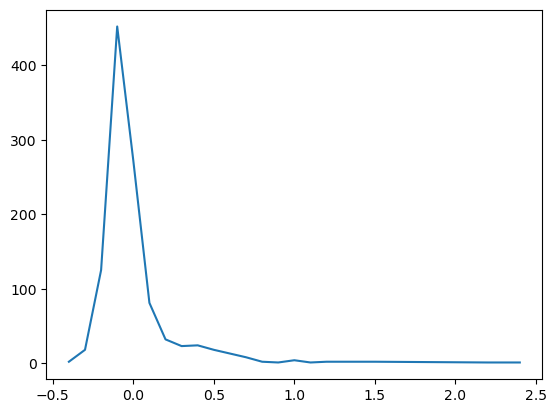

In [75]:
combined_diff["diff"].round(1).value_counts().sort_index().plot()

Visually the model looks good. Most differences fall near or at 0.